#Sprint 8, T01

Data set, sport theme: https://www.kaggle.com/rahul253801/political-donations-by-american-sports-owners. I will analyze the amount of donations from sports owners to political parties in USA.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [52]:
df = pd.read_csv('sports-political-donations.csv',low_memory=False)

In [29]:
df.head(5)

,Owner,Team,League,Recipient,Amount,Election Year,Party
0,Adam Silver,Commissioner,NBA,WRIGHT 2016,"$4,000",2016,Democrat
1,Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,"$2,800",2020,Democrat
2,Adam Silver,Commissioner,NBA,CORY 2020,"$2,700",2020,Democrat
3,Adam Silver,Commissioner,NBA,Kamala Harris for the People,"$2,700",2020,Democrat
4,Adam Silver,Commissioner,NBA,Win The Era PAC,"$2,700",2020,Democrat


In [16]:
df.info()#The value Amount is object or int?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Owner          2798 non-null   object
 1   Team           2798 non-null   object
 2   League         2798 non-null   object
 3   Recipient      2798 non-null   object
 4   Amount         2798 non-null   object
 5   Election Year  2798 non-null   int64 
 6   Party          2789 non-null   object
dtypes: int64(1), object(6)
memory usage: 153.1+ KB


In [53]:
#Extracting only numbers from column Amount
df['Amount']=df['Amount'].str.replace('\D','',regex=True)
df.head(5)

,Owner,Team,League,Recipient,Amount,Election Year,Party
0,Adam Silver,Commissioner,NBA,WRIGHT 2016,4000,2016,Democrat
1,Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,2800,2020,Democrat
2,Adam Silver,Commissioner,NBA,CORY 2020,2700,2020,Democrat
3,Adam Silver,Commissioner,NBA,Kamala Harris for the People,2700,2020,Democrat
4,Adam Silver,Commissioner,NBA,Win The Era PAC,2700,2020,Democrat


In [56]:
#Changing column Amount to int
df['Amount']=df['Amount'].astype('int64')

In [58]:
df['Amount'].dt

dtype('int64')

##Nivell 1

###Execise 1 - select one atribute from dataset, calculate P-value with alpha 5%, can we reject null hypotesis?

I will observe the average of donation during the observed years.

Types of tests:
- Normality test - Observations are independent?
- Correlation test - Two samples are related?
- Stationary tests - Observations are temporally orderd?
- Parametric Statistical Hypothesis Tests - Means of one, two ore more samples are equal?
- Nonparametric Statistical Hypothesis Tests - The distributions of two independent samples are equal?

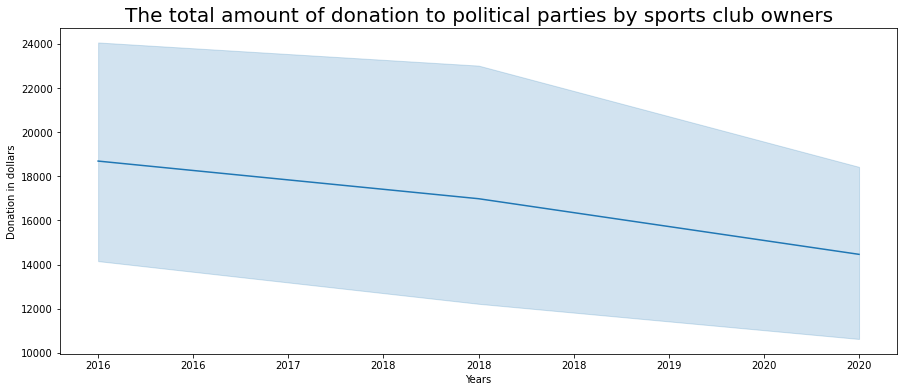

In [152]:
#Amount of donation during years
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize =(15, 6))
g = sns.lineplot(data = df, x='Election Year', y='Amount')
plt.title('The total amount of donation to political parties by sports club owners', fontsize=20)
plt.xlabel('Years')
plt.ylabel('Donation in dollars')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show(g)

In [149]:
mean1 = round(df.Amount.mean(),3)
print('The sample mean of amount of donation is', mean1,'dollars.')

The sample mean of amount of donation is 16790.099 dollars.


Hipothesis: Average donation is 16790 dollars or not?

- $H_0: \mu_A = 16790$ Total average donation is equal to 16790.
- $H_1: \mu_A \neq 16790$ Total average donation is not equal to 16790.

First, I will use parametric Statistical Hypothesis Tests for one sample: T-test.

In [190]:
from scipy.stats import ttest_1samp
x = df['Amount']
alpha = 0.05
tscore, pvalue = ttest_1samp(x, popmean=16790)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)
print('We can not reject H0') if pvalue > alpha else print('We can reject H0')

t Statistic:  6.71416584233938e-05
P Value:  0.9999464334954649
We can not reject H0


Colcusion: We cannot reject null hypothesis with the significance level of 5% that the average donation is 16790 dollars.

##Nivell 2

###Execise 2 - select two atributes from dataset, calculate P-value with alpha 5%, can we reject null hypotesis?

The amount of donation and the party - how can we analize these two?

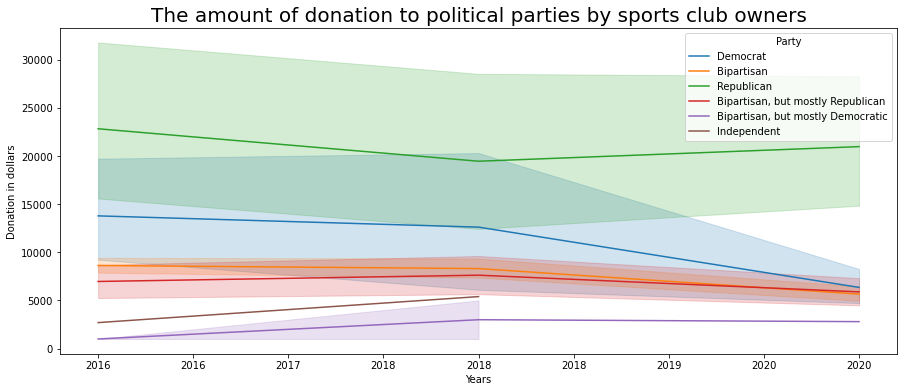

In [151]:
#Amount of donation during years by parties
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize =(15, 6))
g = sns.lineplot(data = df, x='Election Year', y='Amount', hue='Party')
plt.title('The amount of donation to political parties by sports club owners', fontsize=20)
plt.xlabel('Years')
plt.ylabel('Donation in dollars')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show(g)

Hipothesis: Average donation is significantly different to Democrats and Republicants or not?

- $H_0: \mu_D = \mu_R$ Average donations are equal.
- $H_1: \mu_D \neq \mu_R$ Average donations are not equal.

In [158]:
#separate donation by parties
donation_dem = df.loc[df.Party=='Democrat','Amount']
donation_rep = df.loc[df.Party=='Republican','Amount']

In [164]:
donation_dem.count()

921

In [162]:
donation_rep.count()

1625

In [169]:
don_dem = np.array(donation_dem)
don_rep = np.array(donation_rep)

I will check if the values of column Amount are normally distributed(Gaussian). Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

In [215]:
from scipy.stats import shapiro
data = df['Amount']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.165, p=0.000
Probably not Gaussian


The value Amount is not normally distributed, that's why I'll use non-parapetrical Mann-Whitney U Test.

In [218]:
from scipy.stats import mannwhitneyu
data1 = don_dem
data2 = don_rep
alpha = 0.05
stat, p = mannwhitneyu(data1, data2)
print("t Statistic: ", tscore)  
print("P Value: ", p)
print('We can not reject H0') if pvalue > alpha else print('We can reject H0')

t Statistic:  6.71416584233938e-05
P Value:  2.1705392774548137e-21
We can reject H0


Colcusion: We can reject null hypothesis with the significance level of 5% that the average donation is equal to both major parties in U.S. Also if we observe the histogram above, we can see that the amount of donation to Republican party is highter. Why? Is it because the profile of a fan-person tends to be more conservative? It might be true, that would be also the reason why sports club owners support more Republicans than Democrats. Article: https://psmag.com/news/passionate-sports-fans-are-more-likely-to-endorse-right-wing-policies

##Nivell 3

###Execise 3 - select three atributes from dataset, calculate P-value with alpha 5%, can we reject null hypotesis?

League, Amount and election year.

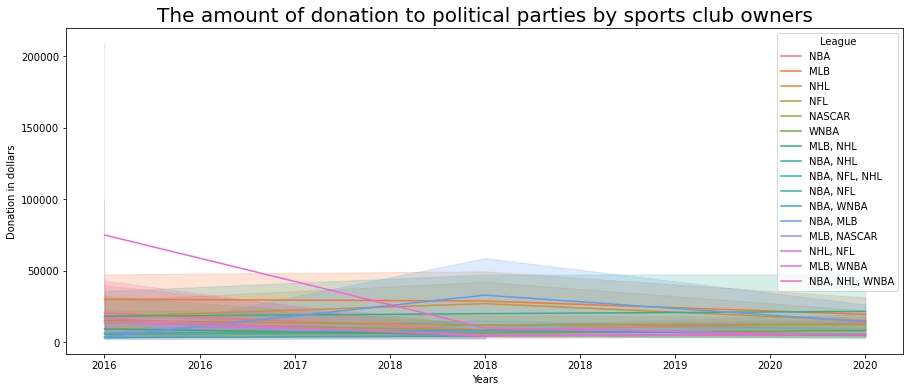

In [196]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize =(15, 6))
g = sns.lineplot(data = df, x='Election Year', y='Amount', hue='League')
plt.title('The amount of donation to political parties by sports club owners', fontsize=20)
plt.xlabel('Years')
plt.ylabel('Donation in dollars')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show(g)

Let's observe the mean of donation by clubs from NBA (basketball), WNBA (womwn basketball), NFL(Football) 

Hipothesis: Average donation is significantly different among the leagues?

- $H_0: \mu_A = \mu_B = \mu_C$ Average donations are equal within the leagues.
- $H_1: $ Average donations are not equal within the leagues.

In [188]:
nba = df.loc[df.League=='NBA','Amount']
wnba = df.loc[df.League=='WNBA','Amount']
nfl = df.loc[df.League=='NFL','Amount']

don_nba = np.array(nba)
don_wnba = np.array(wnba)
don_nfl = np.array(nfl)

I will use non-parametric Statistical Hypothesis Tests : Kruskal-Wallis H Test. Tests whether the distributions of two or more independent samples are equal or not.

In [219]:
from scipy.stats import kruskal
alpha = 0.05
data1 = don_nba
data2 = don_wnba 
data3 = don_nfl
stat, p = kruskal(data1, data2, data3)

print("t Statistic: ", tscore)  
print("P Value: ", pvalue)
print('We can not reject H0') if pvalue > alpha else print('We can reject H0')

t Statistic:  6.71416584233938e-05
P Value:  0.0025753910768095364
We can reject H0


Colcusion: We can reject null hypothesis with the significance level of 5% that the average donation within the leagues is equal.